# GOES

This notebook shows how to download observations from the currently active GOES geo-stationary satellites. The GOES products are available in three views:
1. CONUS: Fixed view of the continental united states.
2. Full disk: The full disk, i.e. covering $-90\ ^\circ$ to $90\ ^\circ$ in latitude.
3. Meso-scale sector: Dynamic, high-resolution observations of storms and other regions of interest.

## GOES 16

Here, we will download level 1b radiances from all channels and display them.

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot
import numpy as np
from datetime import datetime
from pansat.products.satellite.goes import goes_16_l1b_radiances_all_conus

In [2]:
t_0 = datetime(2020, 8, 27, 17, 10)
t_1 = datetime(2020, 8, 27, 17, 15)
files = goes_16_l1b_radiances_all_conus.download(t_0, t_1)

In [ ]:
from satpy import Scene
from glob import glob
 
scn = Scene(reader='abi_l1b', filenames=files)
scn.load(['true_color'])
small_scn = scn.resample(scn.min_area(), resampler='native')
small_scn["true_color_small"] = small_scn["true_color"][:, ::8, ::8]
small_scn.save_dataset('true_color_small', filename='hurricane_laura_16.png')

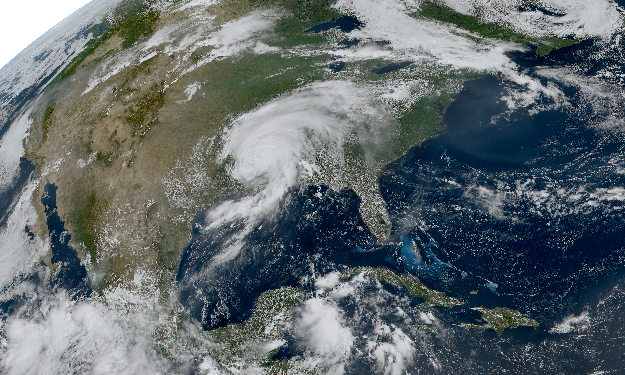

In [4]:
from PIL import Image
laura = Image.open("hurricane_laura_16.png")
laura

## GOES 17

In [3]:
from pansat.products.satellite.goes import goes_17_l1b_radiances_all_conus
t_0 = datetime(2020, 8, 27, 17, 10)
t_1 = datetime(2020, 8, 27, 17, 15)
files = goes_17_l1b_radiances_all_conus.download(t_0, t_1)

In [1]:
scn = Scene(reader='abi_l1b', filenames=files)
scn.load(['true_color'])
 
small_scn = scn.resample(scn.min_area(), resampler='native')
small_scn["true_color_small"] = small_scn["true_color"][:, ::8, ::8]
small_scn.save_dataset('true_color_small', filename='goes_17.png')

NameError: name 'Scene' is not defined

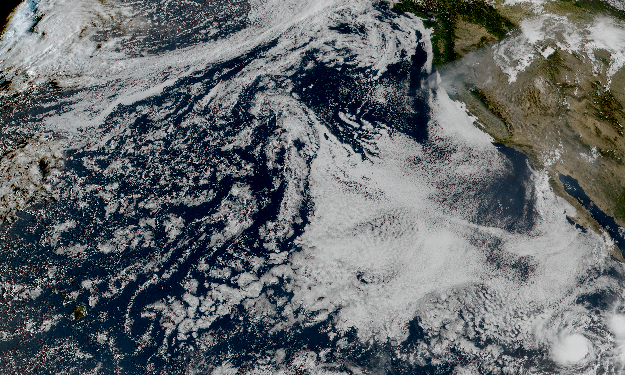

In [7]:
from PIL import Image
laura = Image.open("goes_17.png")
laura